
### Kdney identifier

1.Problem definition
Identify kidney probability based on input provided.

2.Data
it is stuctured data and have information for each coloumn

The six physical characteristics of the urine are: 
    (1) specific gravity, the density of the urine relative to water; 
    (2) pH, the negative logarithm of the hydrogen ion; 
    (3) osmolarity (mOsm), a unit used in biology and medicine but not in
        physical chemistry. Osmolarity is proportional to the concentration of
        molecules in solution; 
    (4) conductivity (mMho milliMho). One Mho is one
        reciprocal Ohm. Conductivity is proportional to the concentration of charged
        ions in solution; 
    (5) urea concentration in millimoles per litre; and 
    (6) calcium concentration (CALC) in millimolesllitre.

Based on site:-https://www.kaggle.com/datasets/vuppalaadithyasairam/kidney-stone-prediction-based-on-urine-analysis
        
3. Evaluation
    Finding the kidney is their or not
4. Feature
    Since it is a stuctured data with boolean result. So it is a classification problem
5. RandomForestClassifier.XGBoostClassifier, LogisticClassifier

6. Tuning the parameter based on result


In [86]:
# Importing required libraries
import pandas as pd
import numpy as np
# conda install lightgbm
import matplotlib.pyplot as plt
%matplotlib inline
# from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from eli5.sklearn import PermutationImportance
import eli5
from sklearn.inspection import PartialDependenceDisplay


In [36]:
# creating a dataframe by importing train dataset
train_data = pd.read_csv("playground/train.csv")
train_data

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [37]:
#Checking datatypes of columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [38]:
# Since all columns are having data int so no need for any conversion. 
# Checking null values
train_data.isna().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

(8.5, -0.5)

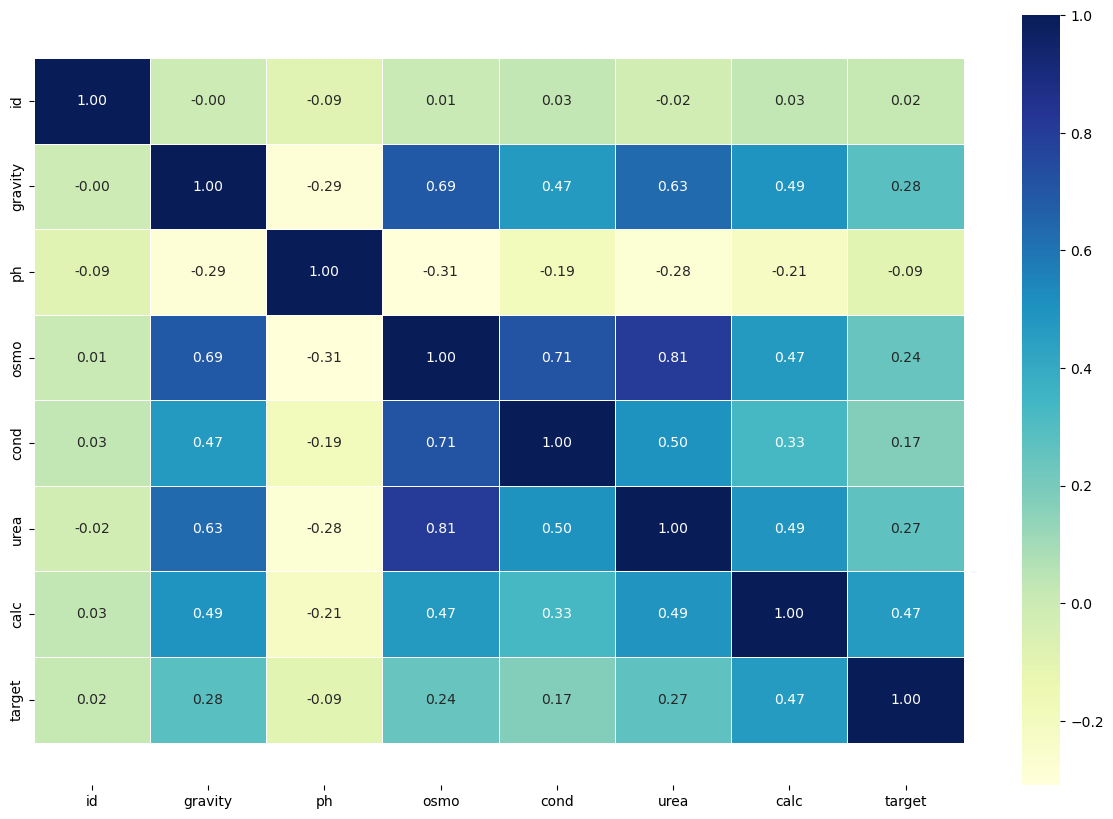

In [39]:
# Let's get familiar with data by reading and doing cross tab
import seaborn as sns
corr_matrix = train_data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
            annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

<AxesSubplot: xlabel='target', ylabel='gravity'>

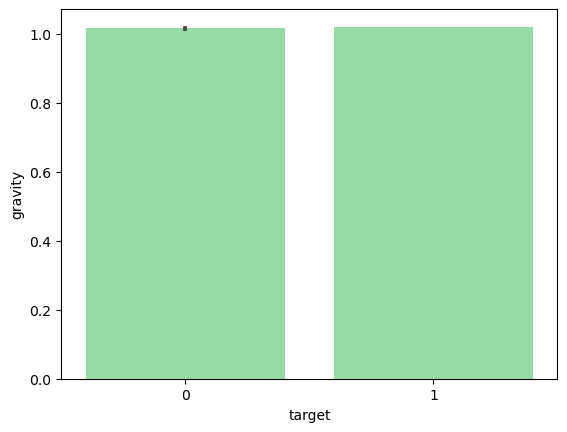

In [40]:

# Plotting bar graph to undrstand it better
# Plot the total target
# {deep, muted, pastel, dark, bright, colorblind}
sns.set_color_codes("pastel")
sns.barplot(x="target",y="gravity",data=train_data,
           label="target",color="g")


In [41]:
# Compare kidney true or false based on gravity
pd.crosstab(train_data.gravity,train_data.target)

target,0,1
gravity,,
1.005,3,0
1.006,2,0
1.007,7,2
1.008,22,7
1.009,8,0
1.010,18,2
1.011,19,9
1.012,7,2
1.013,4,5


<AxesSubplot: ylabel='Frequency'>

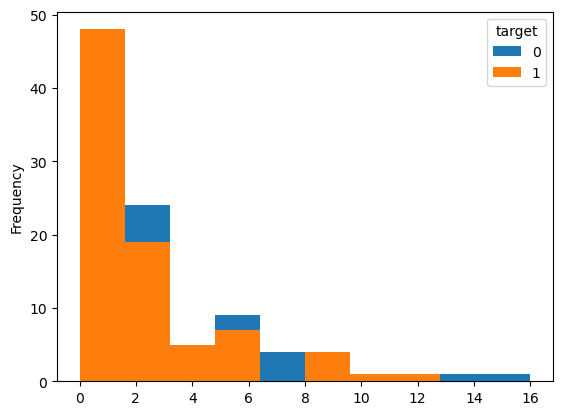

In [42]:
# Compare kidney true or false based on calcium
pd.crosstab(train_data.calc,train_data.target).plot(kind="hist")

In [43]:
pd.crosstab(train_data.calc,train_data.target)


target,0,1
calc,,
0.17,2,3
0.27,2,0
0.58,3,2
0.65,2,2
0.77,3,0
...,...,...
9.39,0,9
12.20,2,0
12.68,4,6


<AxesSubplot: ylabel='Frequency'>

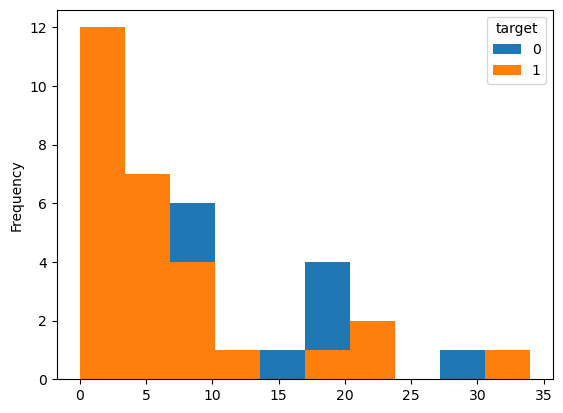

In [44]:
# Compare kidney true or false based on gravity
pd.crosstab(train_data.gravity,train_data.target).plot(kind="hist")

<AxesSubplot: ylabel='Frequency'>

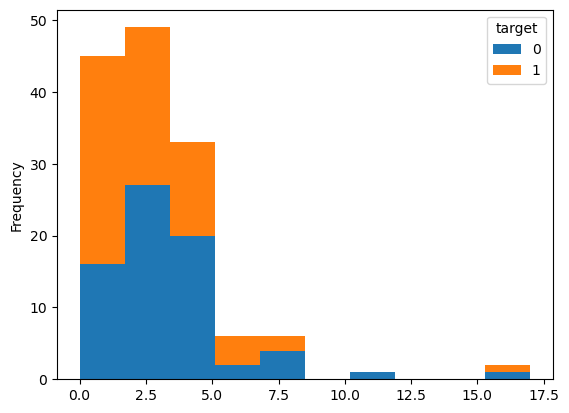

In [45]:
pd.crosstab([train_data.ph],train_data.target).plot(kind="hist",stacked=True)
#a, [b, c], rownames=['a'], colnames=['b', 'c']

In [46]:
train_data


,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


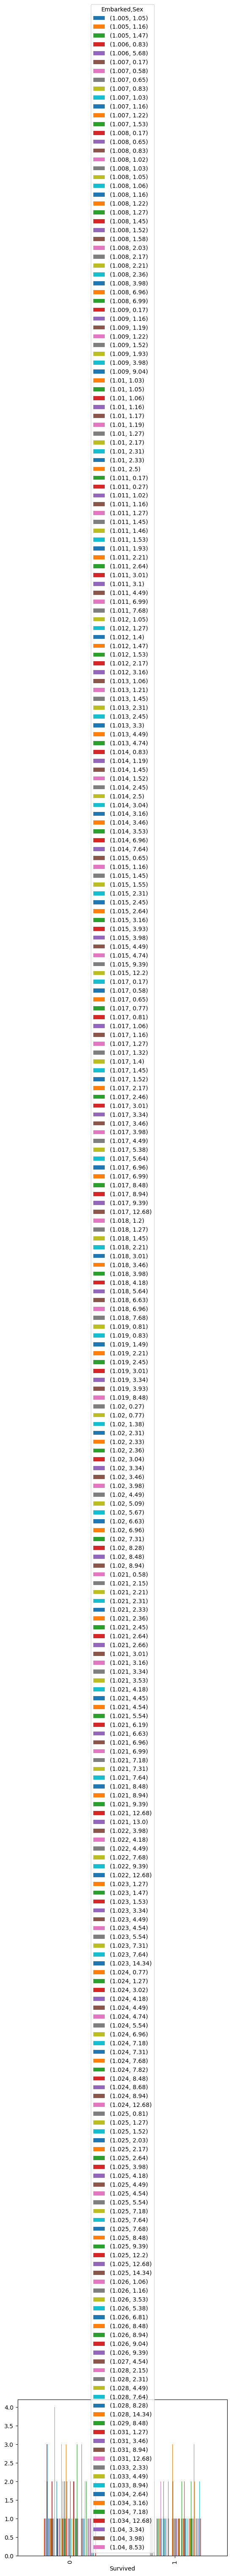

In [47]:
#plotting servival data based on Embarked,sex
cross_tab_data=pd.crosstab(train_data.target,[train_data.gravity,train_data.calc],rownames=['Survived'],colnames=['Embarked','Sex'])
cross_tab_data.plot.bar();

In [48]:
# Split data into X and y
X = train_data.drop(columns=["target"],axis=1)
y = train_data[["target"]]

In [49]:
#Let's compare model with as it is value and then convert it into band of ranges for floating value
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)


In [50]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((331, 7), (83, 7), (331, 1), (83, 1))

In [51]:
# Importing different model for checking performance
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# put the model in dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "RandomForestClassifier":RandomForestClassifier(),
         "XGBClassifier":XGBClassifier()}
    

In [52]:
#Creata a function to fit and score the model
def fit_and_score(models,X_train,X_val,y_train,y_val):
    """
    Fit and evaluate model
    models: It's a dict of model
    X_trian: training data(no labels)
    X_val: validation data(no labels)
    y_train: training data
    y_val: validation data
    """
    
    # Random seed generator
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    #Loop through models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        
        # Evalutate the model and append its score to model_scores
        model_scores[name] = model.score(X_val,y_val.values.ravel())
    return model_scores


In [53]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_val=X_val,
                            y_train=y_train,
                            y_val=y_val)
model_scores

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataCo

{'Logistic Regression': 0.7831325301204819,
 'KNN': 0.5662650602409639,
 'RandomForestClassifier': 0.7590361445783133,
 'XGBClassifier': 0.7108433734939759}

In [54]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#Create a hyperparameter grid for LogistincRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}
#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [55]:
# Setting up logistic regression
np.random.seed(42)

# Running randomsearchCV for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
#Fit random hyperparameter for logisticRegression
rs_log_reg.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [56]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [57]:
rs_log_reg.score(X_val,y_val.values.ravel())

0.7590361445783133

In [58]:
# Hyper parameter tuning for RandomForestClassifier
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)
# Fit random model with hyperparameter tuning
rs_rf.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [59]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [60]:
rs_rf.score(X_val,y_val.values.ravel())

0.7590361445783133

In [61]:
test_data = pd.read_csv("playground/test.csv")
test_data

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36
...,...,...,...,...,...,...,...
271,685,1.029,6.27,853,21.4,364,7.31
272,686,1.012,5.62,410,14.0,195,1.45
273,687,1.031,5.68,874,29.0,380,4.49
274,688,1.019,5.47,543,21.4,170,1.64


In [62]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split, StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import roc_curve, roc_auc_score
from copy import deepcopy
 
class Splitter:
    
    """
    A splitter class which splits the X,y using the split_data funtion with a random stare provided.It yields 
    X_train,X_val,y_train,y_val train_idx, val_idx in the end.
    code from https://www.kaggle.com/code/shoabahamed/playground-s-3-ep-12-eda"""
    
    def __init__(self, test_size=0.2, kfold=True, n_splits=5, use_loocv=False):
        self.test_size = test_size
        self.kfold=kfold
        self.n_splits=n_splits
        self.use_loocv=use_loocv
        
    def split_data(self,X,y,random_state):
        if self.kfold:
            if self.use_loocv:
                kf=LeaveOneOut()
            else:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                
            for train_idx,val_idx in kf.split(X,y):
                X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
                y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
                yield X_train, X_val, y_train, y_val, train_idx, val_idx 
        else:
            X_tain, X_val, y_train, y_val = train_test_split(X, y , test_size=self.test_size, random_state=random_state)
            yield X_train, X_val, y_train,y_val

def evaluate_model(model_name, model_pipeline,_X,_y, features,original_data=None, use_original=False, n_splits=5, random_state_list=[0,5,10],
                  use_loocv=False):
    len_y=len(_y)
    len_states= len(random_state_list)
    
    oof_preds = np.zeros(len_y*len_states).reshape(len_states,len_y)
    scores_train = []
    model_pipelines = []
    
    for index,random_state  in enumerate(random_state_list):
        print("#"*25)
        print("#"*15, f"training model {model_name} with seed {random_state}" )
        print("#"*25)
        splitter = Splitter(n_splits=n_splits, use_loocv=use_loocv)
        splits = 0
        
        for X_train, X_val, y_train, y_val, train_idx, val_idx in splitter.split_data(_X,_y, random_state):
            if use_original:
                target = 'target'
                X_train = pd.concat([X_train, original_data.drop(target, axis=1)])
                y_train = pd.concat([y_train, original_data[target]])
                
  
            model_pipeline.fit(X_train, y_train)
            oof_preds[index, val_idx] = model_pipeline.predict_proba(X_val)[:,1].squeeze()
            
            score_train = roc_auc_score(y_train, model_pipeline.predict_proba(X_train)[:, 1])
            scores_train.append(score_train)
            model_pipelines.append(deepcopy(model_pipeline))
            
    oof_preds_mean = oof_preds.mean(axis=0)
    
    return model_pipelines, oof_preds_mean, np.mean(scores_train), roc_auc_score(_y, oof_preds.mean(axis=0))


def predict_test(model_pipeline, X_test):
    test_preds = model_pipeline.predict_proba(X_test)[:, 1]
    return test_preds

            

In [63]:
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier


In [64]:
train_data

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [66]:
# from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from catboost import CatBoostClassifier
# training data
X = train_data.drop(['id','target'], axis=1)
y = train_data['target']

# add_data = original.copy()
features = X.columns.tolist()
n_splits = 100
random_states = [0]

classifiers = {
    "lr" : LogisticRegression(random_state=0),
    "rf" : RandomForestClassifier(random_state=0),
    "knn" : KNeighborsClassifier(),
    'svc' : SVC(probability=True, random_state=0),
    'et' : ExtraTreesClassifier(random_state=0),
    'Hgb' : HistGradientBoostingClassifier(random_state=0),
    'ada' : AdaBoostClassifier(random_state=0),
    "gb" : GradientBoostingClassifier(random_state=0),
    "xgb" : XGBClassifier(random_state=0),
#     "lgbm" : LGBMClassifier(random_state=0),
    "cat" : CatBoostClassifier(silent=True,random_state=0)
}




In [67]:
models_log = pd.DataFrame(columns=['model_name', 'train score', "valid_score"], index=range(len(classifiers) * 2))
index = 0

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
for model_name, model in classifiers.items():
    pipe = Pipeline(steps=[
        ("scale", StandardScaler()),
        ("model", model)
    ])

    _pipes, _oof_preds, _train_score, _oof_score = evaluate_model(f"pipeline_{model_name}", pipe, X, y, features,
                                             use_original=False,
                                             n_splits=n_splits, random_state_list=random_states, use_loocv=False)
    
    models_log.loc[index] = [model_name, _train_score, _oof_score]
    index += 1;

#########################
############### training model pipeline_lr with seed 0
#########################
#########################
############### training model pipeline_rf with seed 0
#########################
#########################
############### training model pipeline_knn with seed 0
#########################
#########################
############### training model pipeline_svc with seed 0
#########################
#########################
############### training model pipeline_et with seed 0
#########################
#########################
############### training model pipeline_Hgb with seed 0
#########################
#########################
############### training model pipeline_ada with seed 0
#########################
#########################
############### training model pipeline_gb with seed 0
#########################
#########################
############### training model pipeline_xgb with seed 0
#########################
#########################
######

In [70]:
models_log[0:10]

,model_name,train score,valid_score
0,lr,0.79415,0.778521
1,rf,1.0,0.782101
2,knn,0.870712,0.742876
3,svc,0.85262,0.782136
4,et,1.0,0.763906
5,Hgb,0.999195,0.759334
6,ada,0.894469,0.748866
7,gb,0.980532,0.760917
8,xgb,1.0,0.751678
9,cat,0.979293,0.775236


In [71]:
models_log[0:10].to_csv("Baseline_scores_correct.csv", index=False)

In [72]:
models_log[0:10].sort_values("valid_score",ascending=False).head(5)

,model_name,train score,valid_score
3,svc,0.85262,0.782136
1,rf,1.0,0.782101
0,lr,0.79415,0.778521
9,cat,0.979293,0.775236
4,et,1.0,0.763906


In [73]:
def submission_csv(_model,_train,_test):
    X_train = _train.drop(['id','target'],axis=1)
    y_train = _train['target']
    X_test = _test.drop('id',axis=1)
    
    _model.fit(X_train,y_train)
    
    preds = _model.predict_proba(X_test)[:,1]
    
    df = pd.DataFrame()
    
    df['id'] = _test["id"]
    df['target'] = preds
    
    return df

pipe_rf = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('model', RandomForestClassifier(random_state=0))
])

pipe_svc = Pipeline(steps=[
        ('scale',StandardScaler()),
        ('model',SVC(probability=True, random_state=0))
])

rf_df =  submission_csv(pipe_rf, train_data,test_data)
svc_df = submission_csv(pipe_svc, train_data,test_data)

In [74]:
rf_df.to_csv("random_forest_baseline_score.csv", index=False)
svc_df.to_csv("svc_baseline_score.csv", index=False)

In [75]:
def plot_importance(models,X_test,title=""):
    """
    Plots features importance given models and train set"""
    
    features = X_test.columns.tolist()
    feature_importance = pd.DataFrame()
    for model in models:
        _df = pd.DataFrame()
        _df['importance'] = model.feature_importances_
        _df = _df.sort_values(by="importance",ascending=False)
        feature_importance = pd.concat([feature_importance,_df])
        
    feature_importance = feature_importance.sort_values("importance",ascending=False)
    plt.figure(figsize=(16,10))
    ax= sns.barplot(x="importance",y='features', data=feature_importance,color="skyblue",errorbar='sd')
    
    for i in ax.containers:
        ax.bar_label(i,)
        
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.title(f"{title} Feature Importance", fontsize=18)
    plt.grid(True, axis='x')
    plt.show()
    
    return feaure_importance

    

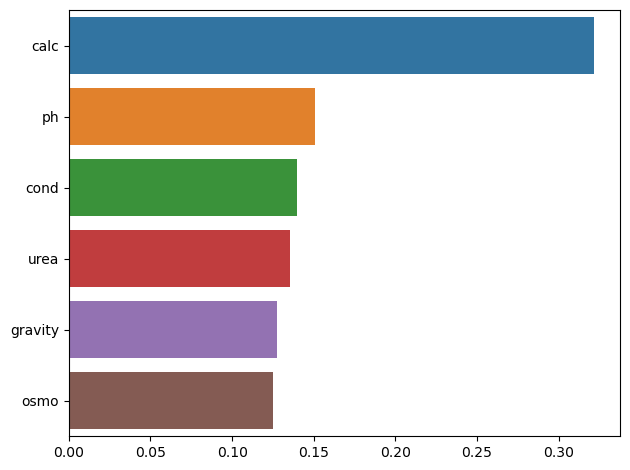

In [76]:
pipe_rf.fit(X,y)
pipe_rf

importance = pd.Series(pipe_rf[-1].feature_importances_, index=X.columns.tolist()).sort_values(ascending=False)
ax = sns.barplot(x=importance.values, y=importance.index)
plt.tight_layout()
# importance

In [77]:
pipe_rf[-1].feature_importances_

array([0.12762692, 0.15086617, 0.12489623, 0.13982316, 0.13533367,
       0.32145383])

In [79]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    pipe_rf[-1], X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

NameError: name 'X_test' is not defined

In [80]:
# perm importance in random forest
perm = PermutationImportance(pipe_rf, scoring='roc_auc', cv=10, n_iter=20).fit(X, y)
eli5.show_weights(perm, feature_names=X.columns.tolist())

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/avinash.kant/Desktop/ml-course/sampleProject2/env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler 

Weight,Feature
0.2334 ± 0.2266,calc
0.0213 ± 0.0641,gravity
0.0173 ± 0.0587,ph
0.0027 ± 0.0577,cond
0.0023 ± 0.0562,urea
-0.0058 ± 0.0541,osmo


In [82]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.1.3.


In [90]:
PartialDependenceDisplay.from_estimator(pipe_rf, X, [('calc','ph','gravity')], pd_line_kw={"color": "blue"}, 
                                            ice_lines_kw={'color': 'lightblue'}, percentiles=(0, 1))
    
plt.title("calcium gravity and ph")  

ValueError: Each entry in features must be either an int, a string, or an iterable of size at most 2.